In [6]:
import pandas as pd
import numpy as np
import networkx as nx

In [8]:
book1 = pd.read_csv('./datasets/book1.csv')

In [9]:
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [10]:
book1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 5 columns):
Source    684 non-null object
Target    684 non-null object
Type      684 non-null object
weight    684 non-null int64
book      684 non-null int64
dtypes: int64(2), object(3)
memory usage: 26.8+ KB


In [12]:
book1.describe()

,weight,book
count,684.000000,684.0
mean,10.769006,1.0
std,17.294432,0.0
min,3.000000,1.0
25%,4.000000,1.0
50%,5.000000,1.0
75%,11.000000,1.0
max,291.000000,1.0


In [7]:
Graph_Book_1 = nx.Graph()

In [19]:
for i, edge in book1.iterrows():
    Graph_Book_1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

In [22]:
Graph_Book_1

In [23]:
books = [Graph_Book_1]
book_names = ['./datasets/book2.csv', './datasets/book3.csv', './datasets/book4.csv', './datasets/book5.csv']

In [24]:
for i in book_names:
    temp_book = pd.read_csv(i)
    temp_book_graph = nx.Graph()
    for _, edge in temp_book.iterrows():
        temp_book_graph.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(temp_book_graph)

In [25]:
books[1]

In [30]:
deg_cen_book1 = nx.degree_centrality(books[0])
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x: x[1], reverse=True)[0:10]
sorted_deg_cen_book1

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

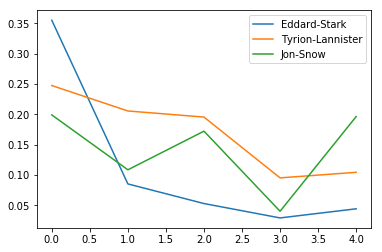

In [31]:
%matplotlib inline
evol = [nx.degree_centrality(book) for book in books]
degree_evol_df = pd.DataFrame.from_records(evol)
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

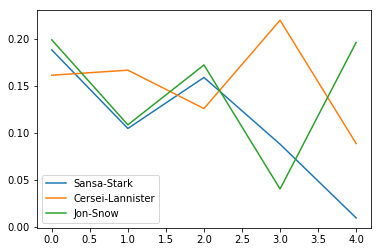

In [33]:
degree_evol_df[['Sansa-Stark', 'Cersei-Lannister', 'Jon-Snow']].plot()

In [34]:
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]
betweenness_evol_df = pd.DataFrame.from_records(evol).fillna(0)
betweenness_evol_df

,Addam-Marbrand,Aegon-Frey-(son-of-Stevron),Aegon-I-Targaryen,Aegon-Targaryen-(son-of-Rhaegar),Aegon-V-Targaryen,Aemon-Targaryen-(Dragonknight),Aemon-Targaryen-(Maester-Aemon),Aenys-Frey,Aeron-Greyjoy,Aerys-I-Targaryen,...,Yellow-Dick,Yezzan-zo-Qaggaz,Ygritte,Yohn-Royce,Yoren,Yorko-Terys,Ysilla,Yurkhaz-zo-Yunzak,Zei,Zollo
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.010753,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.012934,0.0,0.000000,0.0,0.0,0.000000
1,0.000000,0.000000,0.020911,0.000000,0.0,0.0,0.023165,0.0,0.000000,0.0,...,0.000000,0.000000,0.007797,0.000000,0.021489,0.0,0.000000,0.0,0.0,0.000000
2,0.037056,0.001913,0.036763,0.000000,0.0,0.0,0.017567,0.0,0.000000,0.0,...,0.000000,0.000000,0.001518,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
3,0.009715,0.000000,0.000000,0.000000,0.0,0.0,0.014429,0.0,0.043310,0.0,...,0.000000,0.000000,0.000000,0.034094,0.000000,0.0,0.000000,0.0,0.0,0.005306
4,0.000000,0.000000,0.000000,0.049057,0.0,0.0,0.006852,0.0,0.006277,0.0,...,0.000441,0.000057,0.000000,0.000000,0.000000,0.0,0.005425,0.0,0.0,0.000000


In [35]:
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

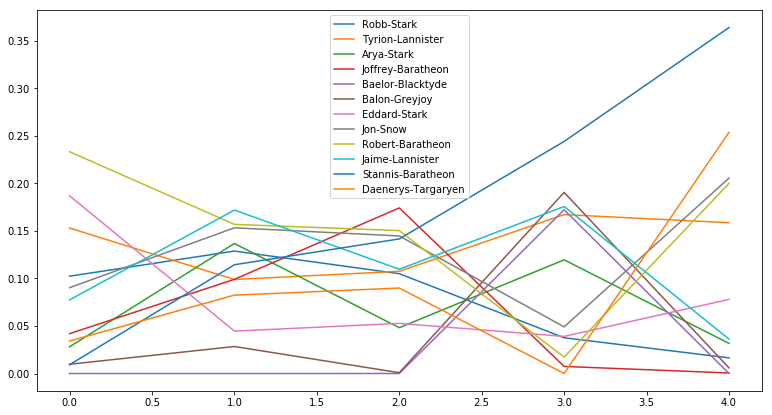

In [36]:
betweenness_evol_df[list_of_char].plot(figsize=(13, 7));

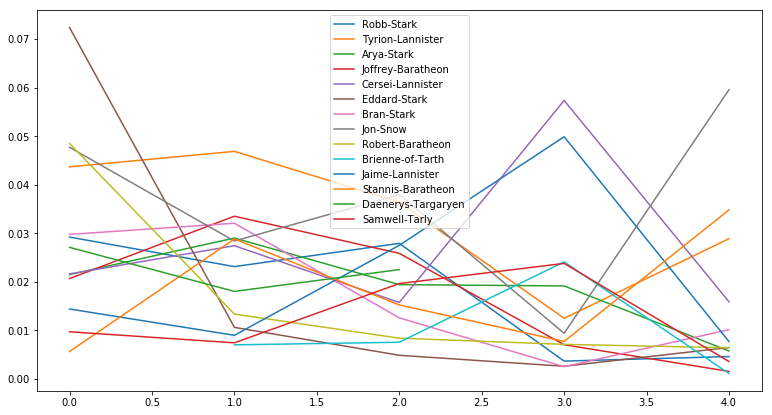

In [37]:
evol = [nx.pagerank(book, weight='weight') for book in books]

pagerank_evol_df = pd.DataFrame.from_records(evol)

set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

pagerank_evol_df[list_of_char].plot(figsize=(13, 7));

In [38]:
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

cor = pd.DataFrame.from_records(measures)

cor.corr().T

,Aegon-I-Targaryen,Aegon-Targaryen-(son-of-Rhaegar),Aemon-Targaryen-(Maester-Aemon),Aenys-Frey,Aeron-Greyjoy,Aerys-II-Targaryen,Aggo,Alliser-Thorne,Alys-Karstark,Alysane-Mormont,...,Wun-Weg-Wun-Dar-Wun,Wylis-Manderly,Wyman-Manderly,Xaro-Xhoan-Daxos,Yandry,Yellow-Dick,Yezzan-zo-Qaggaz,Ygritte,Ysilla,Yurkhaz-zo-Yunzak
Aegon-I-Targaryen,1.000000,0.278893,0.882815,0.999467,0.320632,0.999048,0.971752,0.997956,0.999952,0.998448,...,0.999555,0.999994,-0.008652,0.999886,0.999258,0.995381,0.999977,0.999249,0.938126,1.000000
Aegon-Targaryen-(son-of-Rhaegar),0.278893,1.000000,0.697294,0.310094,0.999043,0.320525,0.497653,0.216958,0.269464,0.224971,...,0.307418,0.275465,0.957873,0.264389,0.315685,0.369802,0.285400,0.241484,0.594191,0.278893
Aemon-Targaryen-(Maester-Aemon),0.882815,0.697294,1.000000,0.897679,0.727980,0.902468,0.968733,0.850996,0.878167,0.855281,...,0.896435,0.881133,0.462065,0.875636,0.900257,0.923834,0.885981,0.863957,0.990853,0.882815
Aenys-Frey,0.999467,0.310094,0.897679,1.000000,0.351383,0.999940,0.978939,0.995338,0.999099,0.996097,...,0.999996,0.999344,0.023997,0.998862,0.999983,0.997984,0.999665,0.997452,0.948931,0.999467
Aeron-Greyjoy,0.320632,0.999043,0.727980,0.351383,1.000000,0.361652,0.535117,0.259450,0.311330,0.267376,...,0.348747,0.317250,0.944394,0.306321,0.356887,0.410089,0.327049,0.283700,0.628804,0.320632
Aerys-II-Targaryen,0.999048,0.320525,0.902468,0.999940,0.361652,1.000000,0.981124,0.994218,0.998572,0.995067,...,0.999905,0.998886,0.034984,0.998277,0.999987,0.998622,0.999321,0.996608,0.952341,0.999048
Aggo,0.971752,0.497653,0.968733,0.978939,0.535117,0.981124,1.000000,0.954686,0.969392,0.957099,...,0.978361,0.970904,0.227586,0.968085,0.980124,0.989921,0.973331,0.961881,0.993353,0.971752
Alliser-Thorne,0.997956,0.216958,0.850996,0.995338,0.259450,0.994218,0.954686,1.000000,0.998535,0.999966,...,0.995606,0.998178,-0.072532,0.998806,0.994753,0.987212,0.997500,0.999683,0.914080,0.997956
Alys-Karstark,0.999952,0.269464,0.878167,0.999099,0.311330,0.998572,0.969392,0.998535,1.000000,0.998946,...,0.999214,0.999981,-0.018455,0.999986,0.998832,0.994392,0.999862,0.999581,0.934686,0.999952
Alysane-Mormont,0.998448,0.224971,0.855281,0.996097,0.267376,0.995067,0.957099,0.999966,0.998946,1.000000,...,0.996342,0.998640,-0.064336,0.999174,0.995560,0.988488,0.998047,0.999856,0.917381,0.998448


In [39]:
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

print(p_rank)
print(b_cent)
print(d_cent)

Jon-Snow
Stannis-Baratheon
Jon-Snow
